In [1]:
import pandas as pd                         #Data
import matplotlib.pyplot as plt             #Gráficas
import nltk                                 #Preprocesamiento
pd.options.display.max_columns = None
nltk.download('punkt')
from nltk.tokenize import word_tokenize     # Palabras
from nltk.probability import FreqDist       # Evaluación de frecuencia
from nltk.corpus import stopwords           # Palabras vacías
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARIAFLOREZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARIAFLOREZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Función abrir respuestas
def apertura_rta(resp):
    lista_resp = []
    for r in resp:
        f = open(r, encoding="utf8")
        raw = f.read()
        lista_resp.append(raw)
    return(lista_resp)

In [4]:
data = ["Respuestas abiertas grupos.txt"]
data = apertura_rta(data)
data

['Medios personales y de terceros Repositorio Institucional Repositorio Institucional Bastante dificil dado que los cambios al interior del grupo han sido lentos En estos momentos debido a la contracción por pandemia los presupuestos se han limitado Muy pobre Por ahora son iniciativas individuales El conocimiento y búsqueda de tendencias en los objetivos de estudio de nuestra área de conocimiento ha sido a través de trabajos de pregrado y posgrado No para todas las áreas es fácilmente apropiable la nuestra en particular Nosotros trabajamos en computación avanzada y de gran escala colaborando con el centro de supercomputación y cálculo científico UIS por lo que es algo que naturalmente adoptamos desde la creación del grupo de investigación e incluso ya abordamos temas de Society 50 En nuestro caso no ha sido un objetivo principal porque nuestro objeto de estudio es el planeta Aunque ha resultado una limitación en el caso de la universidad no contar con un servidor los problemas tecnológ

### Preprocesamiento de los datos

In [5]:
#eliminar tildes

def tildes(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

tilde = []
for word in data:
    words = word.lower() # Convertir a Minúsculas
    tilde.append(tildes(words))

In [6]:
#Eliminar caracteres especiales
import re
patron = "[\W]+"
regex = re.compile(patron)

result = []
for text in tilde:
    resultado = regex.sub(' ', text)
    result.append(resultado)


### Tokenización

In [8]:
# Separación por palabras

tokenized_word = word_tokenize(str(result))
print(tokenized_word)

['[', "'medios", 'personales', 'y', 'de', 'terceros', 'repositorio', 'institucional', 'repositorio', 'institucional', 'bastante', 'dificil', 'dado', 'que', 'los', 'cambios', 'al', 'interior', 'del', 'grupo', 'han', 'sido', 'lentos', 'en', 'estos', 'momentos', 'debido', 'a', 'la', 'contraccion', 'por', 'pandemia', 'los', 'presupuestos', 'se', 'han', 'limitado', 'muy', 'pobre', 'por', 'ahora', 'son', 'iniciativas', 'individuales', 'el', 'conocimiento', 'y', 'busqueda', 'de', 'tendencias', 'en', 'los', 'objetivos', 'de', 'estudio', 'de', 'nuestra', 'area', 'de', 'conocimiento', 'ha', 'sido', 'a', 'traves', 'de', 'trabajos', 'de', 'pregrado', 'y', 'posgrado', 'no', 'para', 'todas', 'las', 'areas', 'es', 'facilmente', 'apropiable', 'la', 'nuestra', 'en', 'particular', 'nosotros', 'trabajamos', 'en', 'computacion', 'avanzada', 'y', 'de', 'gran', 'escala', 'colaborando', 'con', 'el', 'centro', 'de', 'supercomputacion', 'y', 'calculo', 'cientifico', 'uis', 'por', 'lo', 'que', 'es', 'algo', 'qu

### Eliminar Stopwords

In [9]:
#Stopwords
stop_words = set(stopwords.words("spanish"))


In [10]:
def apertura_sw(stop_w):
    sw = []
    for d in stop_w:
        f_sw = open(d, encoding="utf8")
        raw_sw = f_sw.read()
        sw.append(raw_sw)
    return(sw)

In [11]:
s_w = ['stopwords.txt']
vacias = str(apertura_sw(s_w)).split()
stop_words.update(vacias)

In [12]:
#Eliminación Stopwords

filtered_sent=[]

for pal in tokenized_word:
    if pal not in stop_words:
        filtered_sent.append(pal)
        
print("\n Palabras filtradas:",filtered_sent)



 Palabras filtradas: ['[', "'medios", 'personales', 'terceros', 'institucional', 'institucional', 'bastante', 'dificil', 'cambios', 'interior', 'grupo', 'lentos', 'momentos', 'pandemia', 'presupuestos', 'limitado', 'ahora', 'iniciativas', 'individuales', 'conocimiento', 'busqueda', 'tendencias', 'objetivos', 'estudio', 'area', 'conocimiento', 'trabajos', 'pregrado', 'posgrado', 'areas', 'facilmente', 'particular', 'trabajamos', 'computacion', 'avanzada', 'escala', 'colaborando', 'supercomputacion', 'calculo', 'cientifico', 'uis', 'adoptamos', 'creacion', 'grupo', 'investigacion', 'abordamos', 'temas', '50', 'objetivo', 'principal', 'objeto', 'estudio', 'resultado', 'limitacion', 'universidad', 'contar', 'servidor', 'problemas', 'tecnologicos', 'resuelven', 'personal', 'usando', 'sistemas', 'operativos', 'gratuitos', 'linux', 'maquinas', 'propias', 'proyectos', 'investigacion', 'area', 'costos', 'analitica', 'campo', 'altos', 'permiten', 'ocasiones', 'invertir', 'mejoras', 'numeradas',

### Nube de palabras

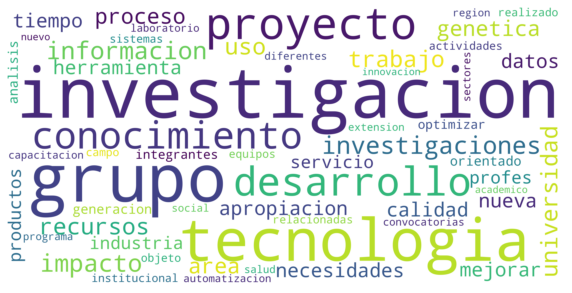

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(min_font_size = 13, max_font_size=100, max_words=200, background_color="white",scale=10, width=800, height=400,stopwords = stop_words).generate(str(result))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear", cmap="PuBuGn")
plt.axis("off")
#plt.savefig("Nube de palabras grupos"+".png", dpi=500)
plt.show()